In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:
#!pip install --upgrade --force-reinstall matplotlib

In [3]:
import matplotlib.pyplot as plt

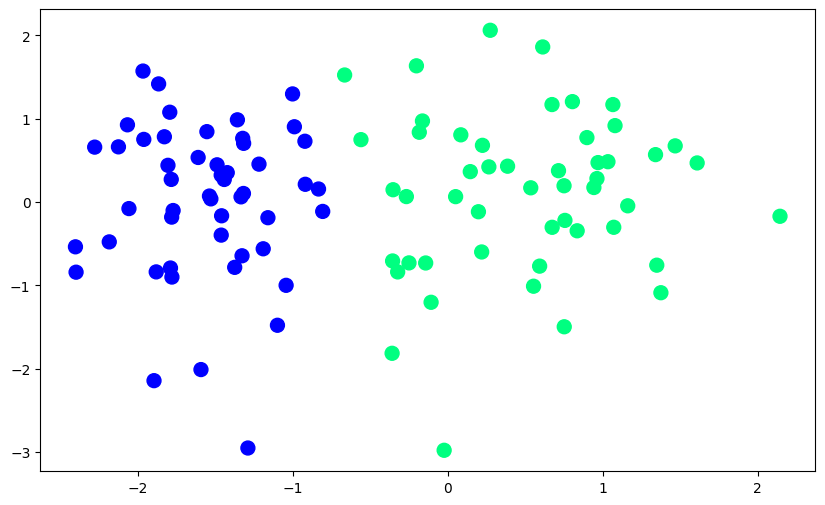

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [5]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

This code implements a simple perceptron learning algorithm. Here's a breakdown:

1. `X` is the input data, a matrix where each row represents a sample and each column represents a feature. `y` is the corresponding target output.

2. `X = np.insert(X, 0, 1, axis=1)` inserts a column of ones at the beginning of the input matrix. This is for incorporating the bias term into the weight vector.

3. `weights = np.ones(X.shape[1])` initializes the weight vector with ones. The length of this vector is equal to the number of features plus one (to account for the bias term).

4. `lr = 0.1` sets the learning rate, which determines the step size of weight updates.

5. The algorithm iterates for a fixed number of iterations, here 1000 times. In each iteration:
   - `j = np.random.randint(0, 100)` selects a random index to choose a sample from the dataset.
   - `y_hat` calculates the predicted output using the step function applied to the dot product of the input sample and the weight vector.
   - `weights = weights + lr * (y[j] - y_hat) * X[j]` updates the weight vector based on the difference between the actual target output `y[j]` and the predicted output `y_hat`. This is the update rule for the perceptron learning algorithm.
   
6. Finally, it returns the bias term (`weights[0]`) and the updated weight vector without the bias term (`weights[1:]`).

The step function mentioned here is typically a simple threshold function. It outputs 1 if the input is greater than or equal to 0, otherwise, it outputs 0. However, this function is not explicitly defined in the provided code.

The purpose of this code is to train a perceptron model to classify data points into two classes based on the input features. The perceptron learning algorithm adjusts the weights iteratively to minimize classification errors.

In [6]:
def step(z):
    return 1 if z>0 else 0

In [7]:
intercept_,coef_ = perceptron(X,y)

In [8]:
print(coef_)
print(intercept_)

[1.39531548 0.06011246]
1.0


In [9]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

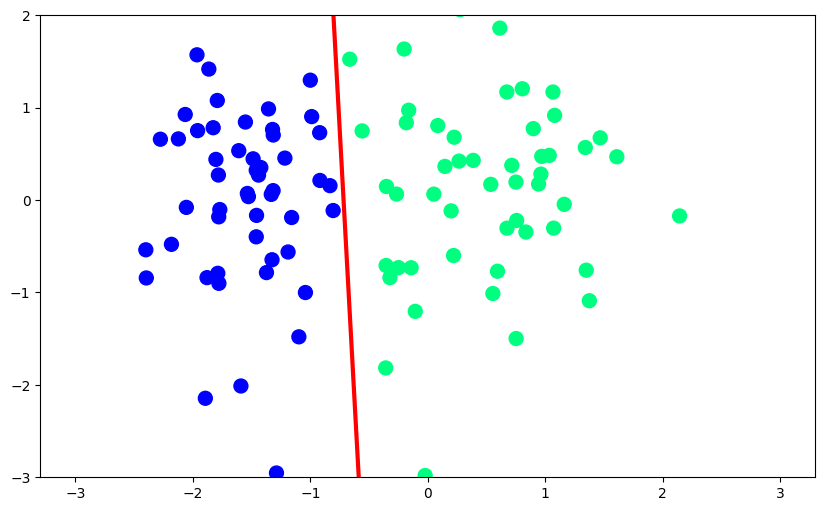

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [12]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [13]:
m,b = perceptron(X,y)

In [14]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [15]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>

In [16]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [17]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [18]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<IPython.core.display.Javascript object>

(-3.0, 2.0)